# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

> The data columns description and thier significance as following :-
    
    > id                    (Description : each film has a unique No.)             (significance : High)
    > imdb_id               (Description : each film has a unique S\N on imbd)     (significance : Low)
    > popularity            (Description : the popularity record for each film)    (significance : High)
    > budget                (Description : the cost for each film)                 (significance : High)
    > revenue               (Description : the revenue for each film)              (significance : High)
    > original_title        (Description : the film name)                          (significance : Meduim)
    > cast                  (Description : the cast names)                         (significance : Meduim)
    > homepage              (Description : the film website)                       (significance : Low)
    > director              (Description : the names of film directors)            (significance : Meduim)
    > tagline               (Description : the phrase identified for film)         (significance : Low)
    > keywords              (Description : the most words related to the film)     (significance : Low)
    > overview              (Description : the brief about the film)               (significance : Low)
    > runtime               (Description : the time at which a film runs)          (significance : Meduim)
    > genres                (Description : the film kind)                          (significance : High)
    > production_companies  (Description : the production companies for the film)  (significance : Meduim)
    > release_date          (Description : the first date to show the film)        (significance : High)
    > vote_count            (Description : the no. of voting person for the film)  (significance : High)
    > vote_average          (Description : the voting average for the film)        (significance : High)
    > release_year          (Description : the first year to show the film)        (significance : High)
    > budget_adj            (Description : the cost for each film in terms of 
                           > 2010 dollars, accounting for inflation over time.)    (significance : High)
    > revenue_adj           (Description : the revenue for each film in terms of 
                           > 2010 dollars, accounting for inflation over time.)    (significance : High)  
    
    > kind                  (Description : New column to show one genres only)      (significance : High)
    > dir_name              (Description : New column to show one director name)    (significance : High)
    > star_name             (Description : New column to show one cast name)        (significance : High)
    > pro_company           (Description : New column to show one producation co.)  (significance : High)


### Question(s) for Analysis
>Which genres are most popular from year to year?

>What kinds of properties are associated with movies that have high revenues?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from bs4 import BeautifulSoup
import requests
import os
from io import BytesIO

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

  Using cached pandas-0.25.0.tar.gz (12.6 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): still running...
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for pandas
Failed to build pandas
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.4
    Uninstalling pandas-1.4.4:
      Successfully uninstalled pandas-1.4.4
  Running setup.py install for pandas: started
  Running setup.py install for pandas: still running...
  Running setup.py install for pandas: finished with status 'error'
  Rolling back uninstall of pandas
  Moving to c:\users\mohamedfouad\anaconda3\lib\site-packages\pandas-1.4.4.dist-info\
   from C:\Users\MohamedFouad\anaconda3\Lib\site-packages\~andas-1.4.4.dist-info
  Moving to c:\users\mohamedfouad\anaconda3\lib\site-packages\pandas\
   from C:\Users\MohamedFouad\anaconda3\Lib\site-packages\~andas


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [909 lines of output]
  C:\Users\MohamedFouad\AppData\Local\Temp\pip-install-iapjlmji\pandas_8b567ecee8b24d52b4c4b06de6124ec1\setup.py:53: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
    _CYTHON_INSTALLED = ver >= LooseVersion(min_cython_ver)
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-39
  creating build\lib.win-amd64-cpython-39\pandas
  copying pandas\conftest.py -> build\lib.win-amd64-cpython-39\pandas
  copying pandas\testing.py -> build\lib.win-amd64-cpython-39\pandas
  copying pandas\_typing.py -> build\lib.win-amd64-cpython-39\pandas
  copying pandas\_version.py -> build\lib.win-amd64-cpython-39\pandas
  copying pandas\__init__.py -> build\lib.win-amd64-cpython-39\pandas
  creating build\lib.win-amd64-cpython-39\pandas\api
  copying pandas\api\__in

<a id='wrangling'></a>
## Data Wrangling


### General Properties


In [3]:
# Load the data 
df = pd.read_csv('tmdb-movies.csv')

In [4]:
df.shape

(10866, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


### Data Cleaning

In [7]:
# Show the no. of duplicated rows
sum(df.duplicated())

1

In [8]:
# Delete the duplicated rows
df = df.drop_duplicates()

In [9]:
# Show the total of non values
df.isnull().any(axis=1).sum()

8873

In [10]:
# Drop unneeded columns
df.drop(['homepage', 'tagline','keywords'], axis=1, inplace = True)

In [11]:
# Drop non values
df = df.dropna()

In [12]:
# Sure that  all data is valuable 
df.isnull().any().sum()

0

In [13]:
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [14]:
# Change the tpe of release_date column to date
df['release_date'] = pd.to_datetime(df['release_date'])

In [15]:
df.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
director                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

In [16]:
# Save the cleaned data in new file
df.to_csv('clean_tmdb_movies.csv', index = False)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Which genres are most popular from year to year?)

In [17]:
def vis_mean (df_name, x, y, stat = 'mean'):
    df_name.groupby([x])[y].agg(stat).plot(kind = 'bar' ,y={y}, figsize =(10,6));
    plt.title(f'{stat} of {y} by {x}'.title());   #plot title
    plt.xlabel(x.title());     # X label name
    plt.ylabel(f'{stat} of {y}'.title());    # Y label name


In [18]:
def vis_sum (df_name, x, y, stat = 'sum'):
    df_name.groupby([x])[y].agg(stat).plot(kind = 'bar' ,y={y}, figsize =(10,6));
    plt.title(f'the sum of {y} by {x}'.title());   #plot title
    plt.xlabel(x.title());     # X label name
    plt.ylabel(f'{stat} of {y}'.title());    # Y label name

In [19]:
def vis_max (df_name, x, y, stat = 'max'):
    df_name.groupby([x])[y].agg(stat).plot(kind = 'bar' ,y={y}, figsize =(10,6));
    plt.title(f'the most {y} by {x}'.title());   #plot title
    plt.xlabel(x.title());     # X label name
    plt.ylabel(f'{stat} of {y}'.title());    # Y label name

In [20]:
def vis_val (df_name, x, y, stat = 'value_counts'):
    df_name[x].agg(stat).plot(kind = 'bar' ,y={y}, figsize =(10,6));
    plt.title(f'the no. of {y} by {x}'.title());   #plot title
    plt.xlabel(x.title());     # X label name
    plt.ylabel(f'{stat} of {y}'.title());    # Y label name

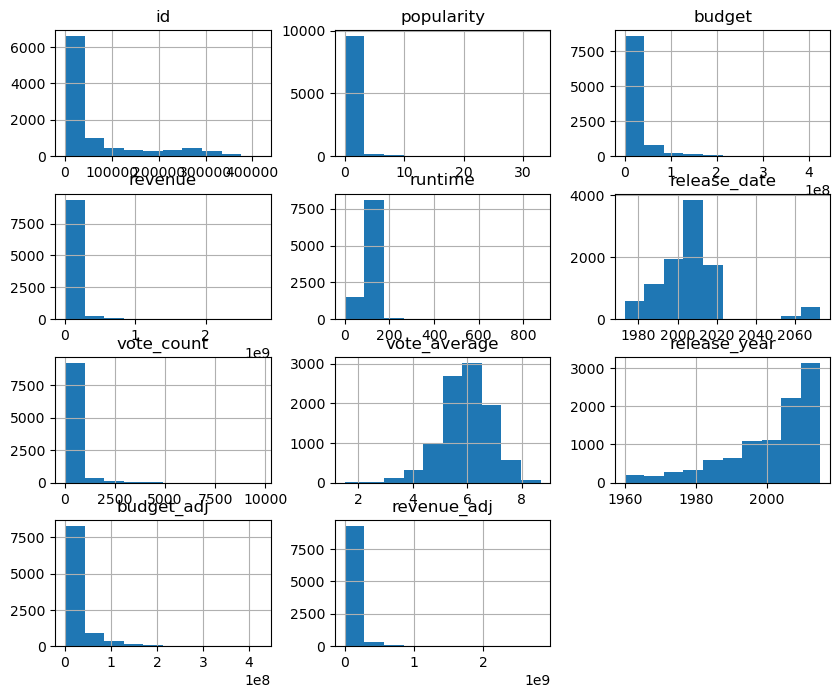

In [21]:
# Show the relations between the columns
df.hist(figsize = (10,8));

In [22]:
# split genres string, at |, explode the list to rows
genres_df = df.assign(genres=df['genres'].str.split('|')).explode('genres')
genres_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


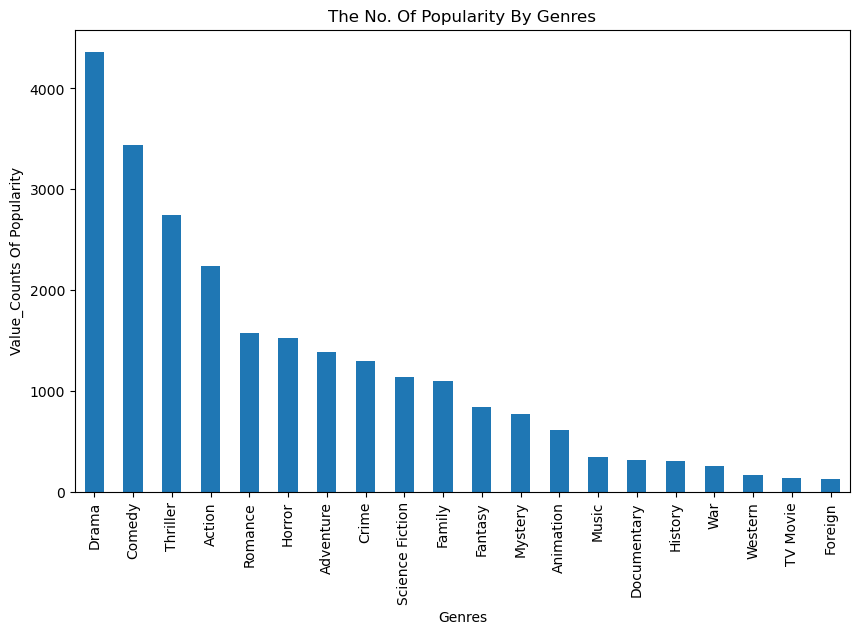

In [23]:
# The no. of popularity by genres chart to show the relation between the popularity and genres which shows that the drama films was the most popular genres from 1960 to 2015.
vis_val(genres_df,'genres','popularity')

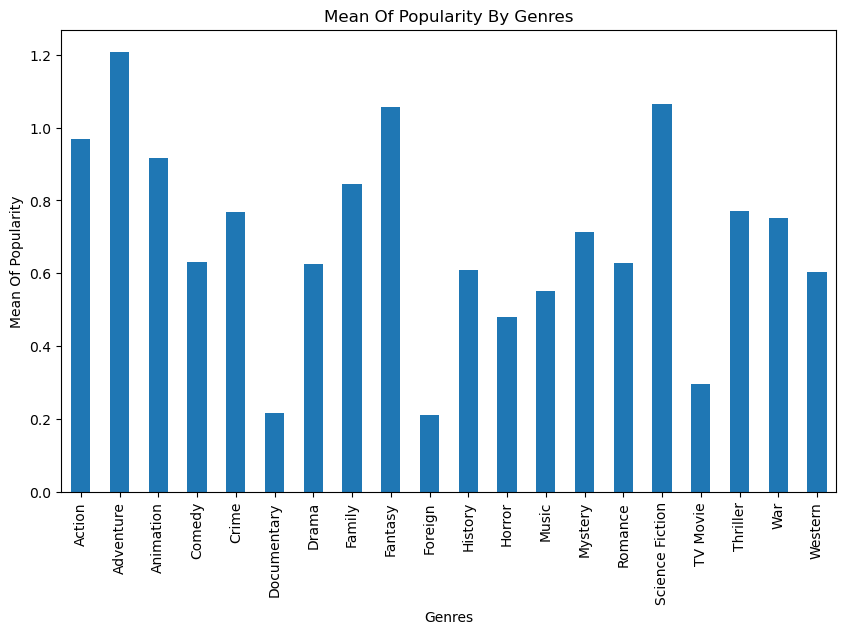

In [24]:
# The mean of popularity by genres chart to show the relation between the mean of popularity and genres which shows that the adventure genres was the most popular genres from 1960 to 2015.
vis_mean(genres_df,'genres','popularity')

In [25]:
pop_year = df.groupby(['release_year','genres'])['popularity'].max().groupby(level='release_year').nlargest(1).reset_index(level=0, drop=True).reset_index()
pop_year.head(3)

,release_year,genres,popularity
0,1960,Drama|Horror|Thriller,2.610362
1,1961,Adventure|Animation|Comedy|Family,2.631987
2,1962,Adventure|Action|Thriller,3.170651


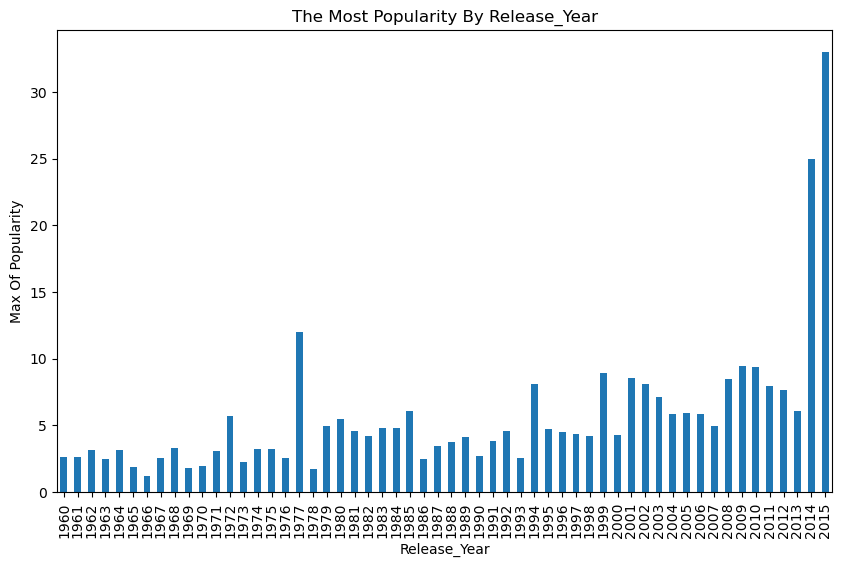

In [26]:
# The max popularity by release_year chart to show the year for most popularity film which shows that 2015 got the most popularity film.
vis_max(pop_year,'release_year','popularity')

### Research Question 2  (What kinds of properties are associated with movies that have high revenues?)

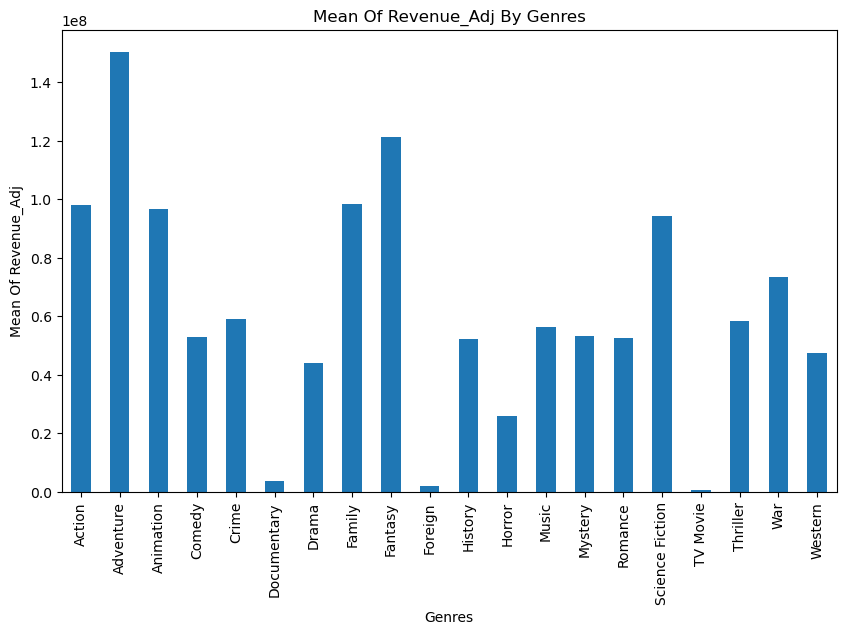

In [27]:
# Show the relation between the revenue films and films genres
vis_mean(genres_df,'genres','revenue_adj')

In [28]:
# Make a new data to extract the revenue after adjusting which is greater than the mean revenue after adjusting
max_rev = df.query('revenue_adj > revenue_adj.mean()')
max_rev.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,2162.000000,2162.000000,2.162000e+03,2.162000e+03,2162.000000,2162.000000,2162.000000,2162.000000,2.162000e+03,2.162000e+03
mean,31625.463460,1.593514,5.047756e+07,1.826669e+08,113.259482,797.493987,6.315264,1999.242831,5.975792e+07,2.361789e+08
std,59370.161766,1.797267,4.944814e+07,2.071864e+08,24.251263,1067.209328,0.732828,12.470632,5.090576e+07,2.488021e+08
min,11.000000,0.010335,0.000000e+00,8.000000e+06,44.000000,10.000000,3.400000,1960.000000,0.000000e+00,5.706803e+07
25%,2109.750000,0.683560,1.500000e+07,6.685752e+07,98.000000,172.000000,5.800000,1992.000000,2.310455e+07,8.989654e+07
50%,9883.000000,1.121285,3.500000e+07,1.132949e+08,110.000000,400.000000,6.300000,2002.000000,4.609463e+07,1.491286e+08
75%,21866.000000,1.864329,7.000000e+07,2.140294e+08,124.000000,962.500000,6.800000,2009.000000,8.374225e+07,2.782718e+08
max,417859.000000,32.985763,3.800000e+08,2.781506e+09,705.000000,9767.000000,8.300000,2015.000000,3.683713e+08,2.827124e+09


C:\Users\MohamedFouad\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


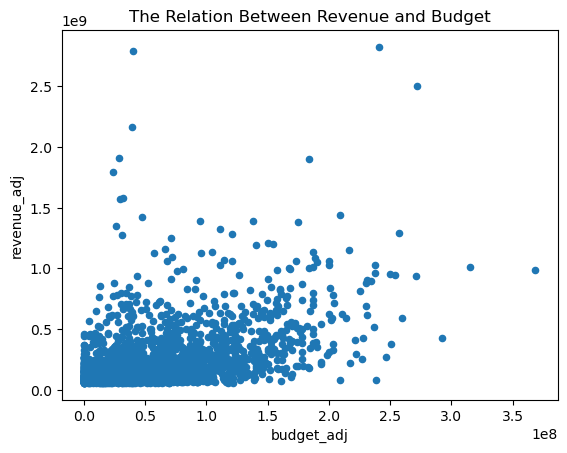

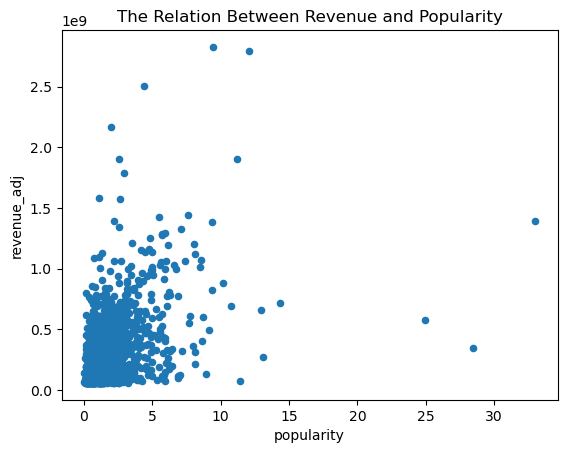

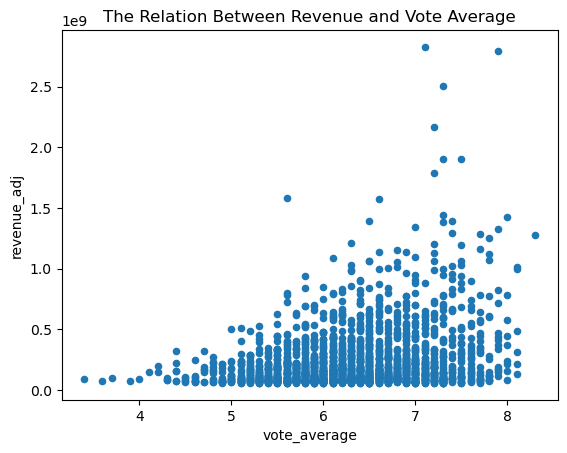

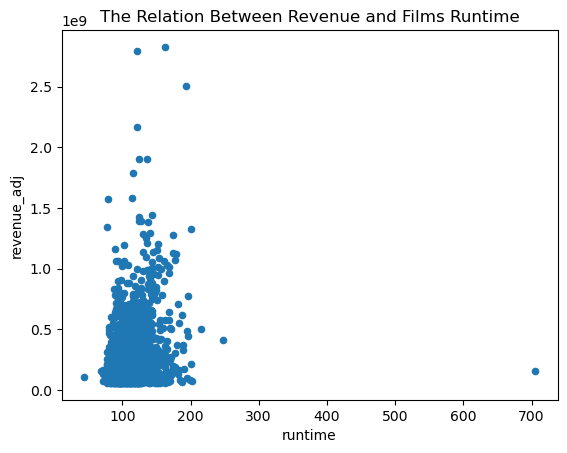

In [29]:
# Show the relation between the most revenue films and budget / popularity / vote average / runtime
max_rev.plot(kind = 'scatter', title='The Relation Between Revenue and Budget', x='budget_adj', y='revenue_adj');
max_rev.plot(kind = 'scatter', title='The Relation Between Revenue and Popularity', x='popularity', y='revenue_adj');
max_rev.plot(kind = 'scatter', title='The Relation Between Revenue and Vote Average', x='vote_average', y='revenue_adj');
max_rev.plot(kind = 'scatter', title='The Relation Between Revenue and Films Runtime', x='runtime', y='revenue_adj');

In [30]:
# Make a new data with the top 20 revenue films after adjusting
top_rev = df.nlargest(n=20, columns = ['revenue_adj'])
top_rev.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09
1329,11,tt0076759,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,Princess Leia is captured and held hostage by ...,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,1977-03-20,4428,7.9,1977,3.957559e+07,2.789712e+09
5231,597,tt0120338,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,"84 years later, a 101-year-old woman named Ros...",194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,1997-11-18,4654,7.3,1997,2.716921e+08,2.506406e+09


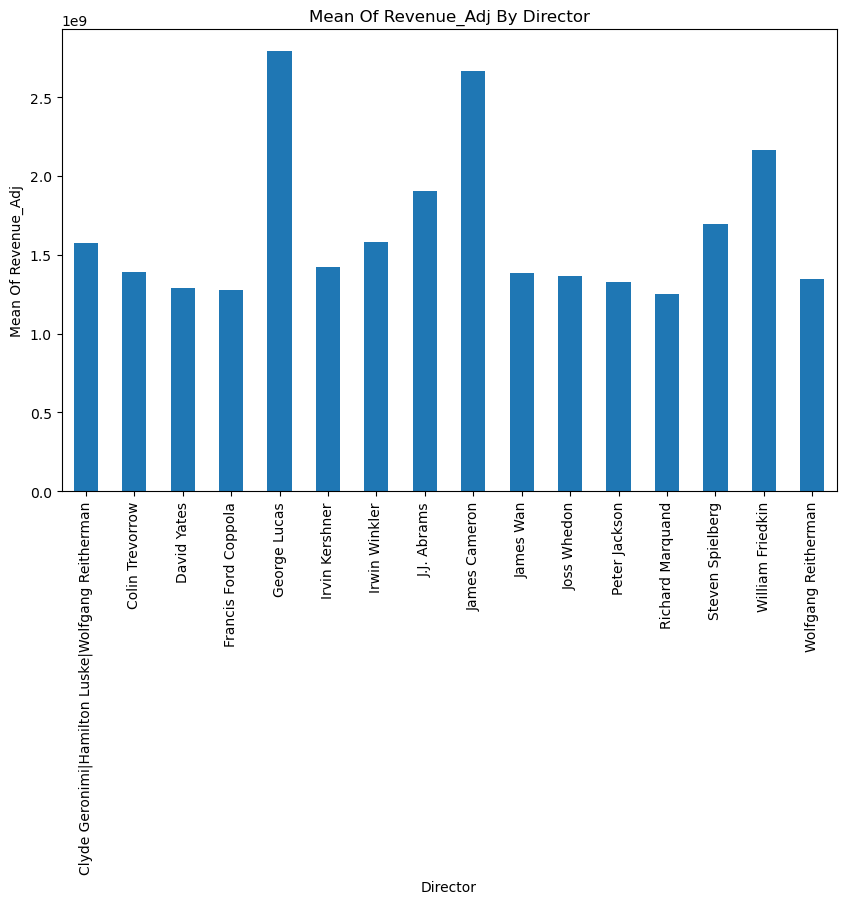

In [31]:
# The sum of revenue_adj by director names chart to show the relation between the revenue after adjusting and director names.
vis_mean(top_rev,'director','revenue_adj')

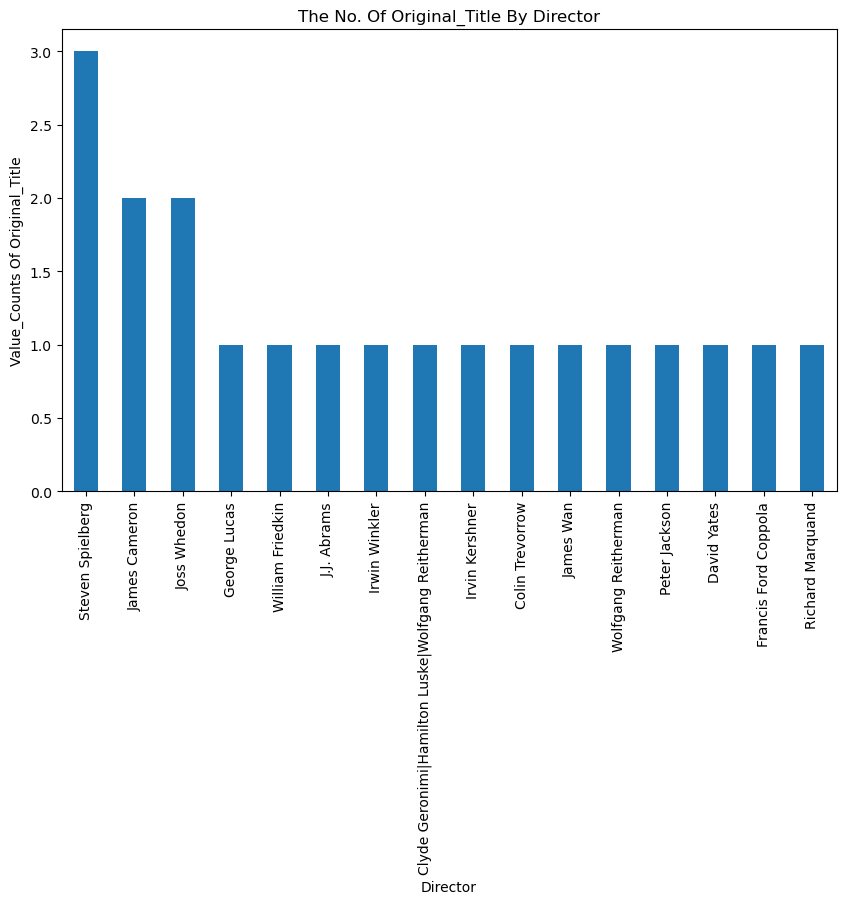

In [32]:
# The most original_title by director chart show that the directors James Cameron and Steven Spielberd directed 5 films from the top 20 revenue films and got the highest revenue.
vis_val(top_rev,'director','original_title')

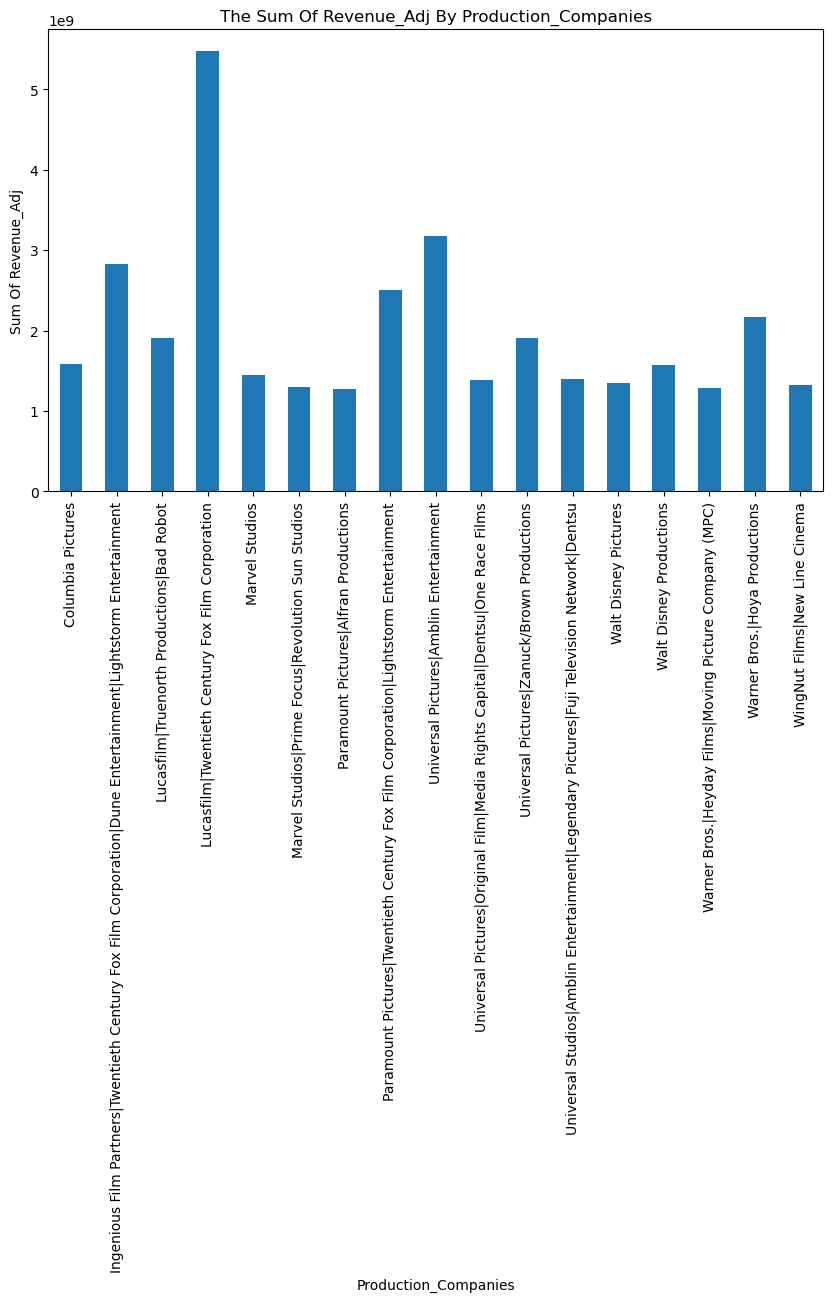

In [33]:
# The sum of revenue_adj by production companies chart to show the relation between the revenue after adjusting and production_companies names.
vis_sum(top_rev,'production_companies','revenue_adj')

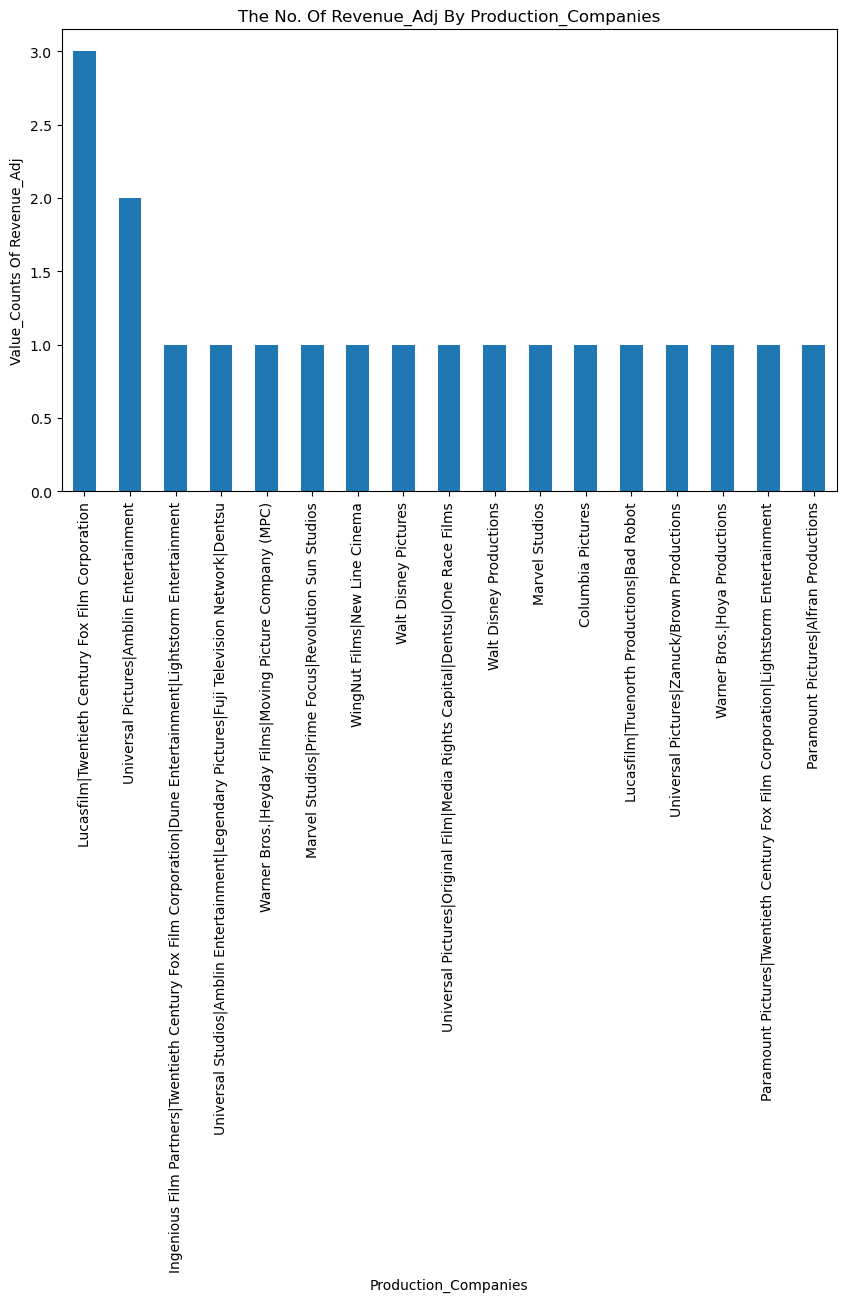

In [34]:
# The no. of original_title by production_companies chart shows that The production companies Lucasfilm..... which produce 3 films from the top 20 revenue films and Universal Pictures\Ambilin... which produce 2 films from the top 20 revenue companies have the highest revenue.
vis_val(top_rev,'production_companies','revenue_adj')

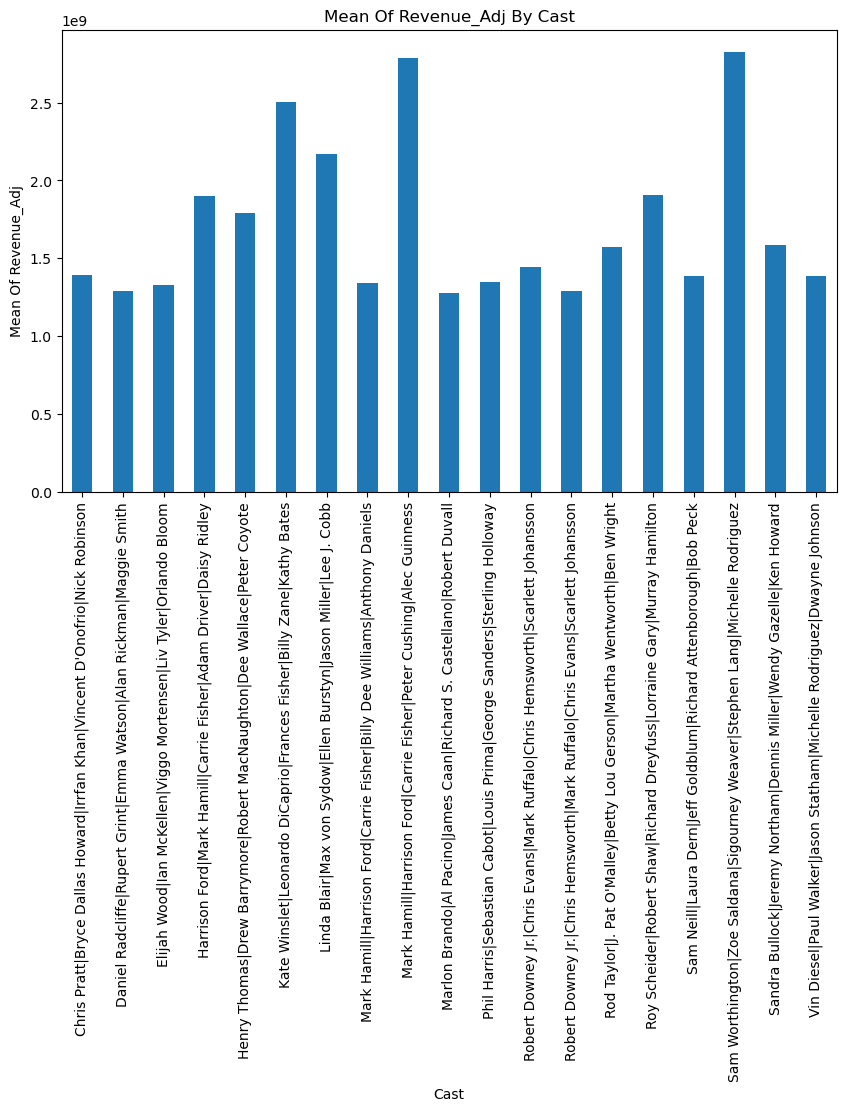

In [35]:
# Show the relation between the top 20 revenue films and the actor name
vis_mean(top_rev,'cast','revenue_adj')

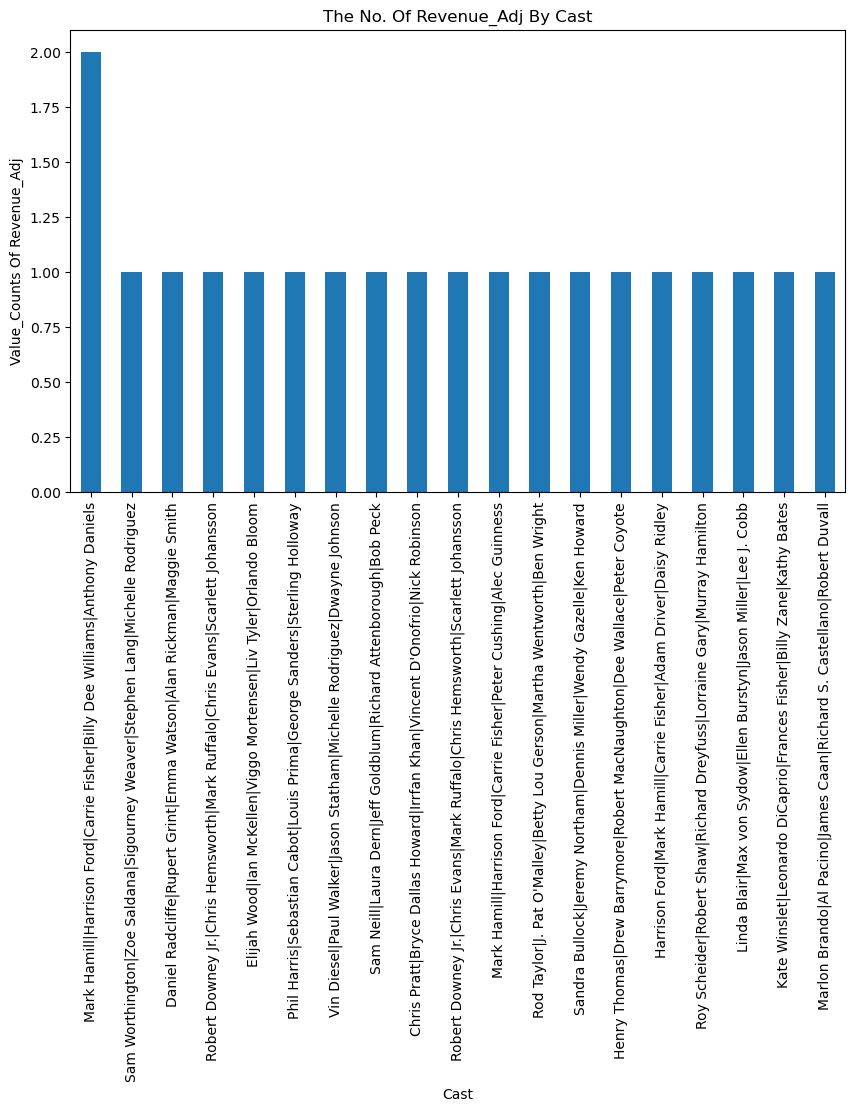

In [36]:
# Show the relation between the number of top 20 revenue films and the actor name
vis_val(top_rev,'cast','revenue_adj')

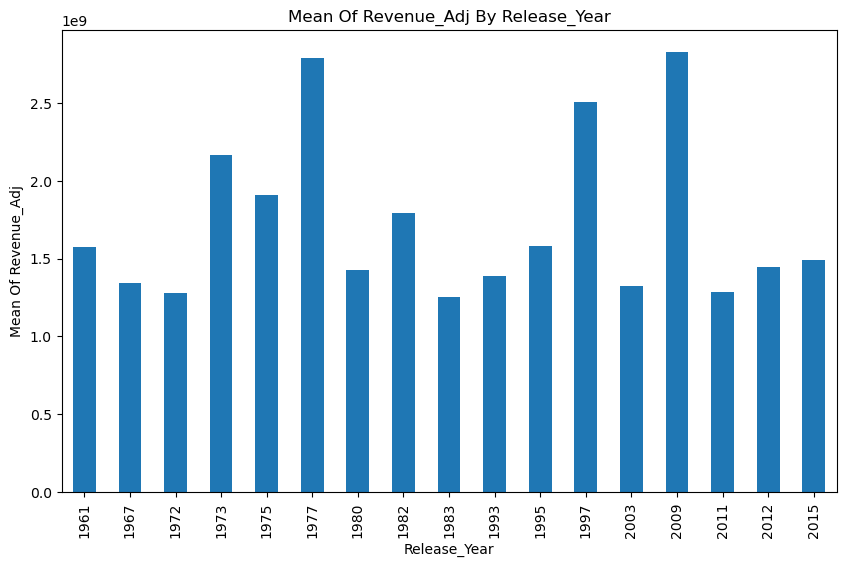

In [37]:
# Show the relation between the number of top 20 revenue films and the release year
vis_mean(top_rev,'release_year','revenue_adj')

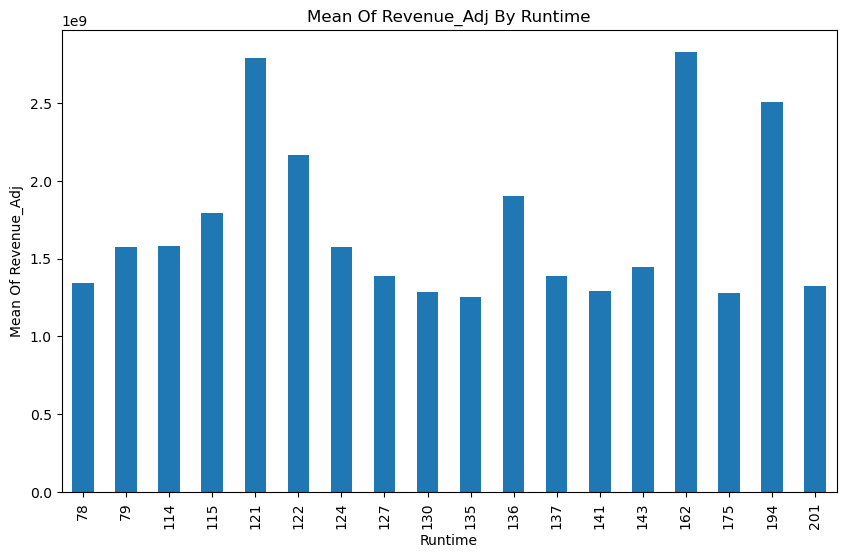

In [38]:
# The mean of revenue_adj by runtime chart shows that the most revenue films runtime between 121 to 194.
vis_mean(top_rev,'runtime','revenue_adj')

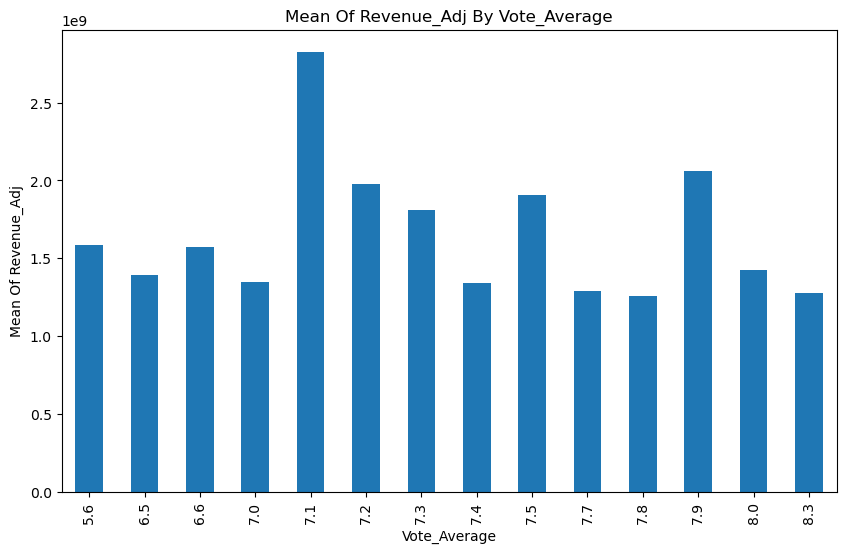

In [39]:
# The mean of revenue_adj by vote_average chart shows that the most revenue films by vote_average between 6.5 to 8.3
vis_mean(top_rev,'vote_average','revenue_adj')

C:\Users\MohamedFouad\AppData\Local\Temp\ipykernel_11032\3613086746.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_rev.groupby(['original_title'])['revenue_adj','budget_adj'].sum().plot(kind = 'bar', color = ('blue','red'), figsize = (10,6));


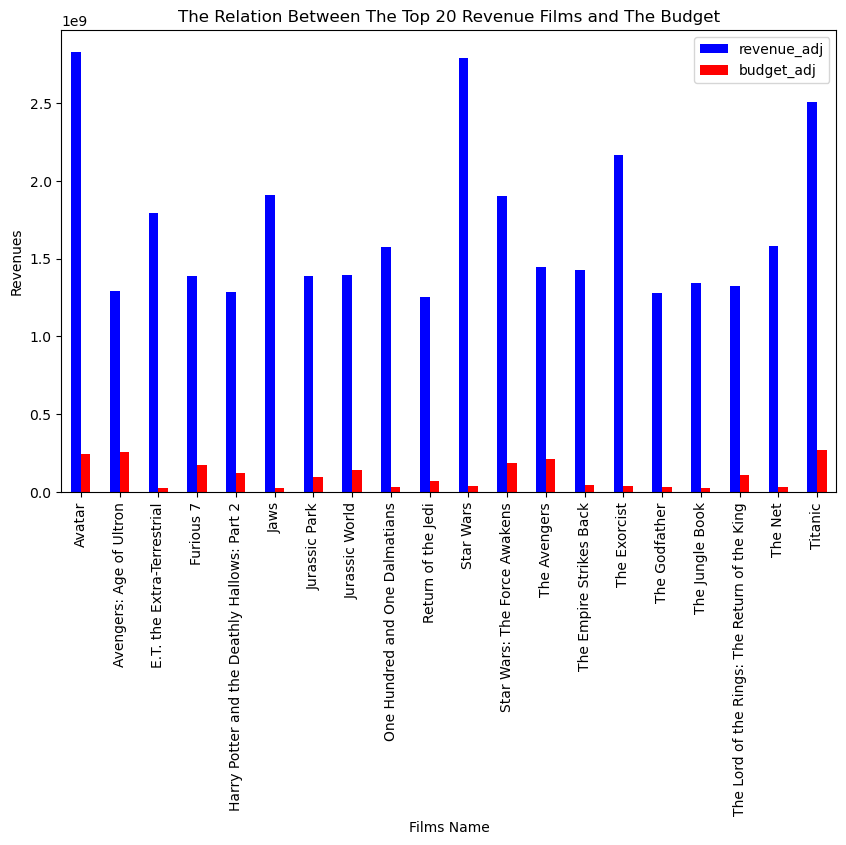

In [40]:
# The Relation Between The Top 20 Revenue Films and The Budget chart.
top_rev.groupby(['original_title'])['revenue_adj','budget_adj'].sum().plot(kind = 'bar', color = ('blue','red'), figsize = (10,6));
plt.title('The Relation Between The Top 20 Revenue Films and The Budget');
plt.xlabel('Films Name');
plt.ylabel('Revenues');

<a id='conclusions'></a>
## Conclusions

> **Which genres are most popular from year to year?**

> The no. of popularity by genres chart to show the relation between the popularity and genres which shows that the drama films was the most popular genres from 1960 to 2015.

> The mean of popularity by genres chart to show the relation between the mean of popularity and genres which shows that the adventure genres was the most popular genres from 1960 to 2015.

> **Conclusions** : The adventure genres was the most popular genres because the mean is more accurate than the frequency number and the popularity of films is usually change from year to another.

> **Additional information** : The max popularity by release_year chart shows the year 2015 has the most popularity film.


> **What kinds of properties are associated with movies that have high revenues?**

> We choose the top 20 revenue films to analyise the relation between the revenues after adjusting column and the rest columns and we find :

> The mean of revenue_adj by genres chart to show the relation between the mean of revenue after adjusting and genres which shows that the adventure films got the heighest revenues.


> The sum of revenue_adj by director names chart to show the relation between the revenue after adjusting and director names and the most original_title by director chart show that the directors James Cameron and Steven Spielberd directed 5 films from the top 20 revenue films and got the highest revenue.

> The sum of revenue_adj by production_companies chart and The no. of original_title by production_companies chart show that The production companies Lucasfilm..... which produce 3 films from the top 20 revenue films and Universal Pictures\Ambilin... which produce 2 films from the top 20 revenue companies have the highest revenue.

> The mean of revenue_adj by runtime chart shows that the most revenue films runtime between 78 to 201.

> The mean of revenue_adj by vote_average chart shows that the most revenue films by vote_average between 6.5 to 8.3

> **Conclusions** : there are some kinds of properties are associated with movies that have high revenues such as the films genres as we see in the mean of revenue_adj by genres chart that the adventure films get the heighest revenues and also in the mean of popularity by genres chart we see that the adventure genres was the most popular genres from 1960 to 2015.
>  the director names, The production companies, the film runtime and vote average.

> **Limitation** : The sample of top 20 revenues films does not reflect the all films or appropriate films result and presence of increasing findings as researched.

## Submitting your Project 

In [41]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295